In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [4]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 10000)

In [5]:
type(x_train)

numpy.ndarray

In [11]:
len(x_train[1])

189

In [12]:
#as all the list has different lenght we have to pad it to the maximum length avaialable in dataset

In [13]:
indexing = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [14]:
indexing

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [15]:
reverse_index = {x:y for y,x in indexing.items()}

In [16]:
reverse_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [17]:
sentence = x_train[0]

In [35]:
def get_sentence(arr_sentence):
  final_sentence = []
  for word in arr_sentence:
    final_sentence.append(reverse_index[word])
  s = ''
  s = ' '.join(l for l in final_sentence)
  return s


In [36]:
print(get_sentence(x_train[2]))

the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me and die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't and as it in character looked cinematography so stories is far br man acting


In [38]:
x_train.shape

(25000,)

In [39]:
#Vectorizing the dataset

In [40]:
import numpy as np

In [43]:
def vectorize_sequence(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [44]:
x_train = vectorize_sequence(x_train)

In [49]:
x_train[2]

array([0., 1., 1., ..., 0., 0., 0.])

In [56]:
#Basically we have vectorised our training data: Vectorised Matrix of dimension Number of sample and maximum number of word in dataset, We will put one in One Hot Matrix at the place which is the index value of word in training example
#One Hot Matrix : Num of Sample,Max number of Words
# if a training sample has value = [23,45,67,12,78,65,89], then the One hot matrix will have One on these places.
#Kinda like boolean masking of the index if word is present in the ith sample or not

In [51]:
x_test = vectorize_sequence(x_test)

In [52]:
type(x_train)
type(x_test)

numpy.ndarray

In [53]:
type(y_train)

numpy.ndarray

In [57]:
y_train = np.asarray(y_train).astype('float32')

In [58]:
y_test = np.array(y_test).astype('float32')

In [60]:
type(y_train)

numpy.ndarray

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
network = Sequential([
                      Dense(units = 16, activation = 'relu',input_shape =(10000,) ),
                      Dense(units= 16,activation = 'relu'),
                      Dense(units = 1,activation = tf.nn.sigmoid)
])

In [71]:
network.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop',metrics = ['accuracy'])

In [72]:
#creating a validation set

In [73]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [75]:
history = network.fit(partial_x_train,partial_y_train,epochs = 20,batch_size= 512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.6847 - val_accuracy: 0.8703
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7083 - val_accuracy: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.7298 - val_accuracy: 0.8670
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 9.8397e-04 - accuracy: 1.0000 - val_loss: 0.7541 - val_accuracy: 0.8669
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 8.1545e-04 - accuracy: 1.0000 - val_loss: 0.7860 - val_accuracy: 0.8652
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.8211 - val_accuracy: 0.8657
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 5.0685e-04 - accuracy: 1.0000 - val_loss: 0.8425 - val_accuracy: 0.8655
E

In [76]:
history_dict = history.history

In [77]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [78]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [79]:
epochs = range(1,len(loss)+1)

In [80]:
import matplotlib.pyplot as plt

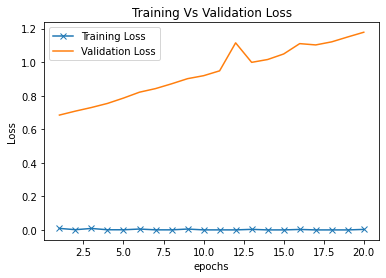

In [82]:
plt.plot(epochs,loss,marker = 'x',label = 'Training Loss')
plt.plot(epochs,val_loss, label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

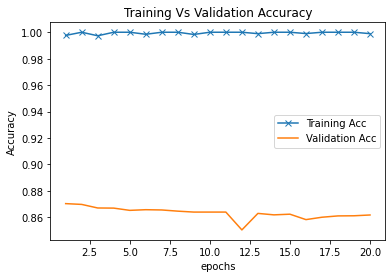

In [83]:
plt.plot(epochs,acc,marker = 'x',label = 'Training Acc')
plt.plot(epochs,val_acc, label = 'Validation Acc')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
#Overfitting: Using a Naive Approach and creating a model with less epochs trained over
network_2 = Sequential([
                      Dense(units = 16, activation = 'relu',input_shape =(10000,) ),
                      Dense(units= 16,activation = 'relu'),
                      Dense(units = 1,activation = tf.nn.sigmoid)
])
network_2.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history_2 = network_2.fit(partial_x_train,partial_y_train,epochs = 4,batch_size = 512,validation_data = (x_val,y_val))

Epoch 1/4
30/30 [==============================] - 2s 56ms/step - loss: 0.5172 - accuracy: 0.7801 - val_loss: 0.3681 - val_accuracy: 0.8543
Epoch 2/4
30/30 [==============================] - 1s 38ms/step - loss: 0.2659 - accuracy: 0.9091 - val_loss: 0.2896 - val_accuracy: 0.8867
Epoch 3/4
30/30 [==============================] - 1s 36ms/step - loss: 0.1845 - accuracy: 0.9410 - val_loss: 0.2774 - val_accuracy: 0.8901
Epoch 4/4
30/30 [==============================] - 1s 35ms/step - loss: 0.1392 - accuracy: 0.9579 - val_loss: 0.2852 - val_accuracy: 0.8864


In [86]:
network_2.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3068 - accuracy: 0.8758


[0.3067619204521179, 0.875760018825531]

In [87]:
network.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.2720 - accuracy: 0.8469


[1.271977186203003, 0.8469200134277344]

In [88]:
#Can be clearly see, Model trained over less Epoch has higher accuracy on test data than the model trained over 20 epochs and gained overfitting